# Proyecto 2

## Resumen del proyecto
Aplica transformación de datos y entrena Modelos Avanzados para desarrollar con mayor profundidad tu modelo de Machine Learning. ¿Qué puedes aprender del problema que estás abordando mediante el estudio de tu propio modelo?

La realización y entrega del Proyecto es individual.

## Entregable
Un Notebook de Jupyter con la resolución de la consigna. El Notebook debe poder ejecutarse sin errores.

## Referencias
Apóyate en las bitácoras, los notebooks trabajados y las presentaciones vistas en clase para resolver tu proyecto. También será de mucha utilidad la documentación de las librerías de Python. No dudes en consultar comunidades online como Stack Overflow y, por supuesto, buscar en la web (googlear).

## Recursos
Para realizar el proyecto:

* Utiliza el siguiente dataset (es el mismo que en el Proyecto 01): Dataset Properati (DSProyecto01DatosProperati.csv)
* Retoma el notebook desarrollado para el Proyecto 01 y considera la devolución que recibiste de tu evaluador/a.

## Consigna
En este proyecto profundizarás lo desarrollado en el proyecto 01 (“Primer modelo de Machine Learning”). El objetivo es aplicar las técnicas incorporadas (Transformación de Datos, Optimización de Hiperparámetros, Modelos Avanzados, etc.) para generar un modelo que tenga un mejor desempeño que el modelo generado en el proyecto anterior. Luego, interpreta ese modelo para responder la siguiente pregunta: ¿qué podemos aprender de nuestro problema estudiando el modelo que generamos?

El trabajo se organiza en tres partes:

### PARTE A - Transformación de Datos

Elige cuáles de las siguientes tareas son apropiadas para su dataset. Implementa las transformaciones que elegiste. Es importante que justifiques por qué las haces:

1. Detección y eliminación de Outliers
2. Encoding
3. Imputación de valores faltantes
4. Escalado de datos
5. Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - con este nuevo dataset transformado. Evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Compara con el desempeño obtenido en el proyecto 01. Sea cual sea la respuesta, intenta explicar a qué se debe.

### PARTE B - Modelos Avanzados

1. Elige dos de los modelos avanzados vistos Compara con el desempeño obtenido en el proyecto 01 (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.
2. Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.
3. Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.

### PARTE C - Interpretación de modelos

De acuerdo a lo que el modelo permite, responde algunas o todas las siguientes preguntas:

* ¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? Si usaste una regresión lineal con regularización, presta atención a los parámetros (pendientes) obtenidas. Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?
* ¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?


## Checklist de evaluación
Sugerencias para desarrollar el proyecto:

* Este proyecto no cuenta con mínimos entregables indicados en la consigna, pero ten en cuenta lo siguiente:
    * en la Parte A debes implementar al menos tres de las transformaciones de datos propuestas.
    * en la Parte B, al menos un modelo debe ser optimizado por Grid Search o Random Search; el otro puede ser optimizado por búsqueda manual (es decir, puedes dejar los mejores parámetros que encontraste probando).
    * en la Parte C, debes responder al menos una pregunta. Obviamente, ¡cuanto más hagas, más aprenderás y mejor será tu proyecto!
* La resolución del proyecto te puede enfrentar a pequeños desafíos que no trabajamos durante los encuentros. Es importante que desarrolles la capacidad de resolverlos. Para ello, consulta las bitácoras, las referencias, los notebooks vistos en clase, la documentación de la librería y, sobre todo, googlea.

Antes de subir tu proyecto a la plataforma Acámica para que sea evaluado, verifica que el Notebook se ejecute sin errores. Además, asegúrate de cumplir con las siguientes condiciones (son las que los/as evaluadores/as tendrán en consideración al momento de corregir tu trabajo):

### PARTE A - Transformación de Datos

1. Debes justificar por qué creés que las transformaciones elegidas aplican en este dataset. Ten en cuenta que, en el manejo de valores atípicos o en la imputación de valores faltantes, los valores obtenidos deben tener sentido. Por ejemplo, valores mayores que cero para superficies, número de baños, etc.
2. Debes re entrenar un modelo del Proyecto 01 y comparar su desempeño con el modelo obtenido en el Proyecto 01. Una aclaración: con reentrenar nos referimos a usar el mismo proceso de entrenamiento junto con sus hiperparámetros. Pero puede ocurrir - y, de hecho, se espera - que el dataset contenga más atributos que los utilizados en el Proyecto 01.


### PARTE B - Modelos Avanzados

1. En la optimización de hiperparámetros, debes justificar los parámetros que elegiste para optimizar y el rango de cada uno.


### PARTE C - Interpretación de modelos

1. Debes estudiar qué variables utiliza el modelo para predecir y responder la pregunta: ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?
2. Es muy importante que analices los errores del modelo. ¿Dónde es mayor el error? ¿dónde acierta?
3. Debes ser crítico/a con la metodología utilizada. ¿Qué mejorarías? Ten en cuenta siempre terminar con una discusión sobre lo realizado y conclusiones obtenidas.

In [1]:
# Importamos librerías para trabajar:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
sns.set()

## Carga del dataset y análsis previos

In [2]:
# Carga del dataset
data = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")

In [3]:
# Visualizar los datos
data.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [4]:
data.tail()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
146655,2019-07-31,2019-08-13,2019-07-31,-34.816348,-58.181963,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,USD,Departamento en Venta en Barrio Privado Barran...,Departamento de 2 ambientesCocina con alacena ...,Departamento,Venta
146656,2019-07-31,2019-08-14,2019-07-31,-34.446459,-58.937810,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,USD,Venta departamentos tres dormitorios jardín co...,Muy buen duplex a estrenar en dos plantas más ...,Departamento,Venta
146657,2019-07-31,2019-08-14,2019-07-31,-34.444633,-58.981606,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,USD,Venta departamento de un ambiente Manzanares C...,"En los Condominios de Campo Manzanares Chico, ...",Departamento,Venta
146658,2019-07-31,2019-08-14,2019-07-31,-34.444830,-58.981796,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,USD,Departamento en Venta. Manzanares chico.,Broker: Maria 11Departamento de dos ambientes ...,Departamento,Venta
146659,2019-07-31,2019-10-12,2019-07-31,-34.444760,-58.981885,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,3.0,2.0,1.0,75.0,75.0,98000.0,USD,Departamento en venta en Manzanares Chico,"Departamento en el Barrio Manzanares Chico , e...",Departamento,Venta


In [5]:
# Para ver la cantidad de filas y columnas del dataset
data.shape

(146660, 19)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

**Información de las columnas del dataset (según el creador):**
* **start_date** - Fecha de alta del aviso.
* **end_date** - Fecha de baja del aviso.
* **created_on** - Fecha de alta de la primera versión del aviso.
* **lat** - Latitud.
* **lon** - Longitud.
* **l1** - Nivel administrativo 1: país.
* **l2** - Nivel administrativo 2: usualmente provincia.
* **l3** - Nivel administrativo 3: usualmente ciudad.
* **rooms** - Cantidad de ambientes (útil en Argentina).
* **bedrooms** - Cantidad de dormitorios (útil en el resto de los países).
* **bathrooms** - Cantidad de baños.
* **surface_total** - Superficie total en m².
* **surface_covered** - Superficie cubierta en m².
* **price** - Precio publicado en el anuncio.
* **currency** - Moneda del precio publicado
* **title** - Título del anuncio.
* **description** - Descripción del anuncio.
* **property_type** - Tipo de propiedad 
* **operation_type** - Tipo de operación (Venta, Alquiler).

Se puede hacer una limpieza del dataset eliminando columnas no necesarias, para reducir la cantidad de datos y memoria utilizada.

Se eliminan las columnas:
* lat y long: representan coordenadas que a la vez se pueden sacar por medio de l3 que son los barrios.
* start_date: no es significativo las fechas 
* end_date
* created_on
* l1: ya que todo es Argentina
* currency: Todas son USD (precio en dólares norteamericanos)
* operation_type: Todas son Venta.

Eliminamos esas columnas para trabajar con el resto:

In [7]:
data = data.drop(["lat", "lon", "start_date", "end_date", "created_on", "l1", "currency", "operation_type"], axis=1)

In [8]:
data.head()

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type
0,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH
4,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH


In [9]:
data.shape

(146660, 11)

### Filtrado de datos por ubicación:

Para ver las propiedades según se ubicación 

a) Propiedades según la **ubicación geográfica** (`l2 y l3`) 

In [10]:
#Para visualizar los datos según l2
data_l2 = data.groupby("l2", sort=False, as_index=False).size().sort_values(by="size",ascending=False)
data_l2

,l2,size
0,Capital Federal,92539
2,Bs.As. G.B.A. Zona Norte,24282
1,Bs.As. G.B.A. Zona Sur,17173
3,Bs.As. G.B.A. Zona Oeste,12666


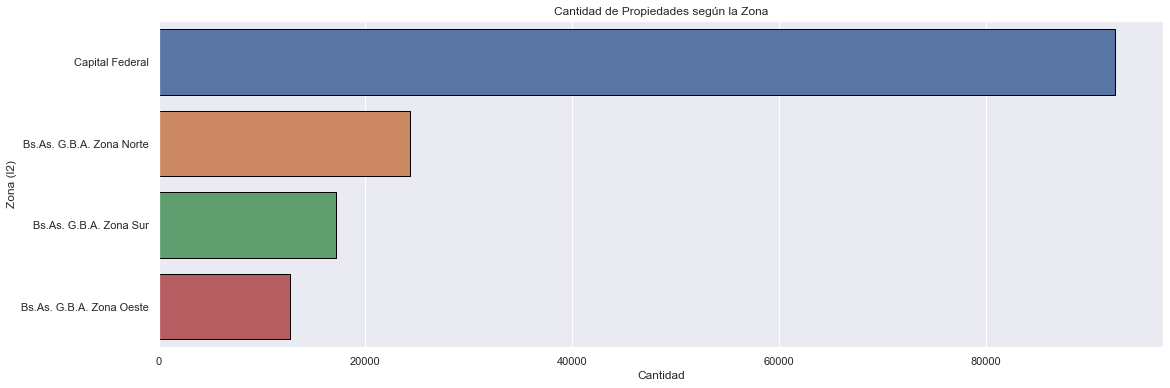

In [11]:
plt.figure(figsize=(18,6))

sns.barplot(data = data_l2, x="size", y= "l2", lw=1, edgecolor="black")

plt.xlabel("Cantidad")
plt.ylabel("Zona (l2)")
plt.title("Cantidad de Propiedades según la Zona")
plt.show()

In [12]:
#Para visualizar los datos según l3
data_l3 = data.groupby("l3", sort=False, as_index=False).size().sort_values(by="size",ascending=False)
data_l3

,l3,size
2,Palermo,13073
8,Tigre,8718
13,Almagro,7527
14,Belgrano,6935
18,Caballito,6650
...,...,...
86,Cañuelas,108
87,Villa Soldati,69
85,Villa Riachuelo,42
75,Marcos Paz,35


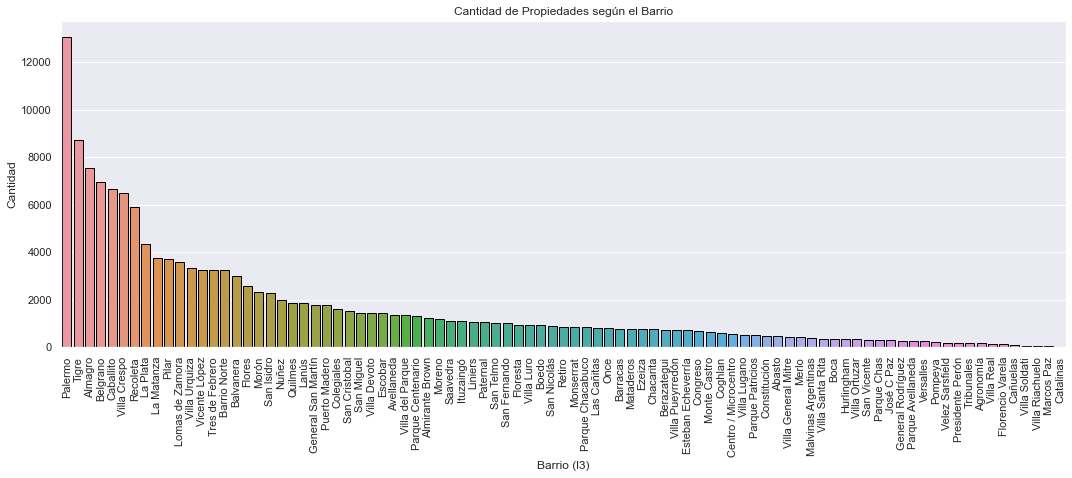

In [13]:
plt.figure(figsize=(18,6))

sns.barplot(data = data_l3, x="l3", y= "size", lw=1, edgecolor="black")

plt.xticks(rotation=90)
plt.xlabel("Barrio (l3)")
plt.ylabel("Cantidad")
plt.title("Cantidad de Propiedades según el Barrio")
plt.show()

Podemos ver que el grueso de las propiedades se encunetran en Capital Federal y en los barrios de Palermo, Tigre, Almagro, Belgrano y Caballito.

b) Filtro según el **tipo de propiedad** 

In [14]:
#Para visualizar los datos según property_type
data_propiedad = data.groupby("property_type", sort=False, as_index=False).size().sort_values(by="size",ascending=False)
data_propiedad

,property_type,size
0,Departamento,107326
2,Casa,21521
1,PH,14298
3,Lote,1312
5,Oficina,658
6,Otro,374
7,Local comercial,325
4,Casa de campo,322
9,Depósito,265
8,Cochera,259


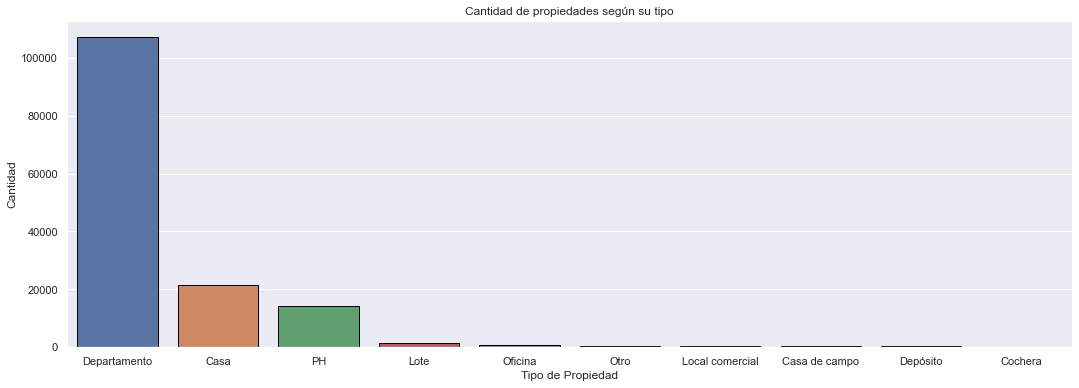

In [15]:
plt.figure(figsize=(18,6))

sns.barplot(data = data_propiedad, x="property_type", y= "size", lw=1, edgecolor="black")

plt.title ("Cantidad de propiedades según su tipo")
plt.xlabel("Tipo de Propiedad")
plt.ylabel("Cantidad")
plt.show()

Podemos ver que las propiedades más importantes son `Departamento, Casa y PH`. El resto de tipos de propiedades no es tan significativo, por lo que se pueden eliminar.

In [16]:
#Dejamos en el dataset sólo las columnas de Departamento, Casa y PH
data = data[data.l2.isin(["Capital Federal"]) & data.property_type.isin(["Departamento", "Casa", "PH"])]

In [17]:
data.shape

(91485, 11)

In [18]:
#Validamos que sólo haya quedado Capital Federal.
data.groupby("l2", sort=False, as_index=False).size().sort_values(by="size",ascending=False)

,l2,size
0,Capital Federal,91485


In [19]:
#Validamos que sólo haya quedado esos tres tipos de propiedades.
data.groupby("property_type", sort=False, as_index=False).size().sort_values(by="size",ascending=False)

,property_type,size
0,Departamento,79029
1,PH,9764
2,Casa,2692


## Parte A Transformación de Datos

### Datos Duplicados:

Para ver las filas que están duplicadas:

In [20]:
filas_duplicadas = data[data.duplicated()]

In [21]:
filas_duplicadas.head(15)

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type
7,Capital Federal,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Muy lindo PH, con terraza propia, 96m2! por es...",PH
9,Capital Federal,Parque Patricios,1.0,1.0,1.0,45.0,37.0,89000.0,"PH SIN EXPENSAS, AMPLIO MONOAMBIENTE DIVISIBLE...","VENTA DE PH, EN EXCELENTE ESTADO, EN PARQUE PA...",PH
40,Capital Federal,Palermo,2.0,1.0,1.0,49.0,41.0,169000.0,Oportunidad - CON COCHERA !! Excelente ubicaci...,Para Visitarlo contactarse al 01161534481 Mart...,Departamento
43,Capital Federal,Palermo,2.0,1.0,1.0,49.0,41.0,169000.0,Oportunidad - CON COCHERA !! Excelente ubicaci...,Para Visitarlo contactarse al 01161534481 Mart...,Departamento
45,Capital Federal,Palermo,2.0,1.0,1.0,49.0,41.0,169000.0,Oportunidad - CON COCHERA !! Excelente ubicaci...,Para Visitarlo contactarse al 01161534481 Mart...,Departamento
48,Capital Federal,Palermo,2.0,1.0,1.0,49.0,41.0,169000.0,Oportunidad - CON COCHERA !! Excelente ubicaci...,Para Visitarlo contactarse al 01161534481 Mart...,Departamento
49,Capital Federal,Palermo,2.0,1.0,1.0,49.0,41.0,169000.0,Oportunidad - CON COCHERA !! Excelente ubicaci...,Para Visitarlo contactarse al 01161534481 Mart...,Departamento
51,Capital Federal,Palermo,2.0,1.0,1.0,46.0,40.0,145000.0,U$S 145.000 - 2 amb en Duplex - Palermo - Char...,Charcas 5200Palermo2 ambientes en Dúplex.45.68...,Departamento
54,Capital Federal,Palermo,2.0,1.0,2.0,81.0,76.0,410000.0,Nuevo Ingreso Palacio Bellini Alquiler,Excelente departamento de dos ambientes de 81m...,Departamento
55,Capital Federal,Palermo,2.0,1.0,1.0,49.0,41.0,169000.0,Oportunidad - CON COCHERA !! Excelente ubicaci...,Para Visitarlo contactarse al 01161534481 Mart...,Departamento


In [22]:
filas_duplicadas.shape

(25315, 11)

Vemos que hay 25,315 filas repetidas que pueden ser registros que se hicieron en diferentes días con exactamente la misma información, por lo que se consideran como duplicados (a pesar de ser de diferentes días).

En caso de dejar estas filas repetidas pueden alterar el funcionamiento del modelo, por lo que es mejor eliminarlas del dataset.

In [23]:
#Eliminamos las filas duplicadas
data = data.drop_duplicates()

In [24]:
#Validamos que hayan desaparecido las filas duplicadas.
data.shape

(66170, 11)

### Caso superficies: surface_total vs surface_covered

La superficie cubierta no puede ser mayor que la superficie total.

In [25]:
#Para ver cuantos casos tenemos en los que la superficie cubierta es mayor que la total
sup_data = data[data["surface_covered"] > data["surface_total"]]

In [26]:
sup_data.head()

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type
446,Capital Federal,Villa Santa Rita,5.0,4.0,3.0,230.0,244.0,490000.0,VENTA CASA 5 AMBIENTES,Corredor Responsable: Mónica Silvia Martinuzzi...,Casa
859,Capital Federal,Belgrano,3.0,2.0,1.0,43.0,44.0,133000.0,Departamento 3 ambientes.Belgrano,Corredor Responsable: Gustavo Guastello - C.U....,Departamento
924,Capital Federal,Villa Pueyrredón,3.0,2.0,1.0,65.0,66.0,187000.0,VENTA DEPTO 3 AMB VILLA PUEYRREDON CON COCHERA,Corredor Responsable: EMMA A. PIERSIMONI - CPI...,Departamento
1329,Capital Federal,Recoleta,2.0,1.0,2.0,44.0,45.0,235000.0,DIVINO 2 AMB BAÑO Y TOIL RECICLADO POR ARQUITECTO,Corredor Responsable: KARINA QUINTEROS - CUCIC...,Departamento
1438,Capital Federal,Congreso,3.0,2.0,1.0,78.0,79.0,235000.0,Venta dep-Congreso 3 amb-Restaurado-Impecable-,Corredor Responsable: Ariel Champanier - C.U.C...,Departamento


In [27]:
sup_data.shape

(750, 11)

Hay 750 registros que tienen mayor la superficie cubierta que la superficie total, se puede imputar cambiando la superficie Total por la Cubierta.

In [28]:
#Cambiamos los valores en los que la superficie cubierta sea mayor que la superficie total
data["surface_total"] = np.where(data["surface_covered"] > data["surface_total"], data["surface_covered"], data["surface_total"])

In [29]:
#Comprobamos que haya cambiado el dataset
sup_data = data[data["surface_covered"] > data["surface_total"]]
sup_data

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type


### Imputación de datos faltantes:

In [30]:
print (data.isnull().sum())

l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms          2053
surface_total      8481
surface_covered    8750
price                 0
title                 0
description           0
property_type         0
dtype: int64


Podemos ver que hay datos faltantes:
- 2,053 baños,
- 8,481 superficie total,
- 8,750 superficie cubierta.

Haremos una imputación con `KNNImputer` que hace la imputación con base de los vecinos más cercanos y se utiliza para casos multivariables.

Para la imputación vamos a utilizar las columnas: `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y crearemos una columna nueva con `label encoder` para `property_type`, para que se clasifiquen los datos a imputar dependiendo del tipo de propiedad. Aunque la columna `price` sería una de las mejores columnas para predecir estos valores, al final es nuestro objetivo, así que evitamos darla a conocer.

Se utiliza `label encoder` para darle números de 1, 2 y 3 a los tres tipos de propiedades que tenemos y entre este dato para clasificar las propiedaddes dentro de la imputación (recordando que sólo trabajamos con números y no con categorías) 


#### Label Encoder para el tipo de propiedades


In [31]:
#Importamos librería de preprocesamiento de datos
from sklearn import preprocessing

In [32]:
#Instanceamos
le = preprocessing.LabelEncoder()

In [33]:
le.fit(data["property_type"])

LabelEncoder()

In [34]:
#Para ver las clases se hicieron:
le.classes_

array(['Casa', 'Departamento', 'PH'], dtype=object)

En esta lista tenemos:
- Casa = 0, 
- Departamento = 1, 
- PH = 2, 


In [35]:
#Para agregar la columna al dataset sin alterar el original:
data["property_type_le"] = le.transform(data["property_type"])

In [36]:
#Revisamos los datos filtrados comparando la fila original con su encoder:
data.groupby(["property_type", "property_type_le"], sort=False, as_index=False).size().sort_values(by="size",ascending=False)

,property_type,property_type_le,size
0,Departamento,1,56886
1,PH,2,6674
2,Casa,0,2610


In [37]:
#Ver que se haya generado la nueva columna
data.head()

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type,property_type_le
0,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,1
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,2
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,2
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,2
5,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,2


Cambiamos los `0` de  `Casa` por el número `3` para que el sistema no los vaya a tomar como NaN, faltante o nulo y lo vaya a completar al hacer la imputación:

In [38]:
data.replace({"property_type_le": {0:3, 1:1, 2:2}},  inplace = True)

In [39]:
#Validamos el cambio:
data.groupby(["property_type", "property_type_le"], sort=False, as_index=False).size().sort_values(by="size",ascending=False)

,property_type,property_type_le,size
0,Departamento,1,56886
1,PH,2,6674
2,Casa,3,2610


#### Imputación con KNNImputer

In [40]:
#Separamos las columnas para hacer la imputación sin que el modelo conozca todos los datos 
#(price, que es el dato a investigar)
X_imp = data[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "property_type_le"]]

In [41]:
X_imp.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type_le
0,7.0,7.0,2.0,140.0,140.0,1
1,2.0,1.0,2.0,70.0,58.0,2
2,2.0,1.0,1.0,45.0,45.0,2
3,2.0,1.0,1.0,85.0,50.0,2
5,2.0,1.0,1.0,56.0,56.0,2


In [42]:
print (X_imp.isnull().sum())

rooms                  0
bedrooms               0
bathrooms           2053
surface_total       8481
surface_covered     8750
property_type_le       0
dtype: int64


In [43]:
#Importamos las librerías a utilizar:
from sklearn.impute import KNNImputer

In [44]:
#Hacemos la imputación con 3 vecinos para utilizar un número impar de vecinos
#y 3 fue el mejor desempeño en el proyecto 1.
imputacion = KNNImputer(n_neighbors=3)

In [45]:
#Hacemos la Imputación y transformación de los datos
X_imp = imputacion.fit_transform(X_imp)

In [46]:
X_imp

array([[  7.,   7.,   2., 140., 140.,   1.],
       [  2.,   1.,   2.,  70.,  58.,   2.],
       [  2.,   1.,   1.,  45.,  45.,   2.],
       ...,
       [  4.,   3.,   3., 175., 111.,   2.],
       [  3.,   2.,   2., 144., 134.,   2.],
       [  4.,   2.,   2., 317., 143.,   2.]])

Quedó un arreglo de numpy con los valores imputados. Hacemos un dataframe para darle forma:

In [47]:
X_imp = pd.DataFrame(X_imp,
                     columns = ["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "property_type_le"])

In [48]:
X_imp

,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type_le
0,7.0,7.0,2.0,140.0,140.0,1.0
1,2.0,1.0,2.0,70.0,58.0,2.0
2,2.0,1.0,1.0,45.0,45.0,2.0
3,2.0,1.0,1.0,85.0,50.0,2.0
4,2.0,1.0,1.0,56.0,56.0,2.0
...,...,...,...,...,...,...
66165,2.0,1.0,1.0,80.0,80.0,1.0
66166,3.0,2.0,2.0,88.0,82.0,1.0
66167,4.0,3.0,3.0,175.0,111.0,2.0
66168,3.0,2.0,2.0,144.0,134.0,2.0


In [49]:
#Validamos que ya no haya valores faltantes.
X_imp.isnull().sum()

rooms               0
bedrooms            0
bathrooms           0
surface_total       0
surface_covered     0
property_type_le    0
dtype: int64

In [50]:
#Integramos el dataset con los datos imputados al dataset original:
data["bathrooms"] = np.where(data["bathrooms"], X_imp["bathrooms"], X_imp["bathrooms"])
data["surface_total"] = np.where(data["surface_total"], X_imp["surface_total"], X_imp["surface_total"])
data["surface_covered"] = np.where(data["surface_covered"], X_imp["surface_covered"], X_imp["surface_covered"])

In [51]:
#Comprobamos que no haya datos faltantes en las tres columnas (bathrooms, surface_total, surface_covered)
data.isnull().sum()

l2                  0
l3                  0
rooms               0
bedrooms            0
bathrooms           0
surface_total       0
surface_covered     0
price               0
title               0
description         0
property_type       0
property_type_le    0
dtype: int64

Podemos ver que ya no hay datos faltantes en el dataset que estamos preparando para trabajar con los modelos de Machine Learning.

In [52]:
#Eliminamos la columna con el label encoder
data = data.drop("property_type_le", axis=1)

### Detección y eliminación de Outliers

In [53]:
#Revisamos los datos estadísticos para ver cómo se comportan los datos
data.describe().T

,count,mean,std,min,25%,50%,75%,max
rooms,66170.0,2.926251,1.351338,1.0,2.0,3.0,4.0,26.0
bedrooms,66170.0,1.928125,1.081445,0.0,1.0,2.0,3.0,15.0
bathrooms,66170.0,1.550597,0.858658,1.0,1.0,1.0,2.0,14.0
surface_total,66170.0,119.398242,1105.944864,12.0,49.0,71.0,111.0,126062.0
surface_covered,66170.0,96.681729,867.162086,1.0,44.0,63.0,95.0,126062.0
price,66170.0,254704.493532,317026.566071,6000.0,119800.0,170000.0,278000.0,32434232.0


#### Observaciones:

Los valores máximos del dataset están muy "fuera de lo normal", por lo que nos damos cuenta que tiene muchos outliers.

* **Rooms:** 26, por lo que parece demasiados.
* **Bedrooms:** Su máximo es de 15, por lo que también parece demasiado.
* **Bathrooms:** De igual forma vienen 14.
* **Superficie Total y Cubierta:** Además la desviación estándar de ambas columnas (features) son mayores que el valor de la media, lo que quiere decir que los valores están demasiado dispersos.
* **Precio:** De igual forma que en las superfies, los precios tienen la desviación estándar más alta que la media (hay mucha variación entre los precios de las propiedades).

#### Visualización de datos en boxplots

Por las cantidad (unidades) en las que se dan, hacemos dos boxplots: superficies y espacios (rooms, bedrooms, bathrooms)

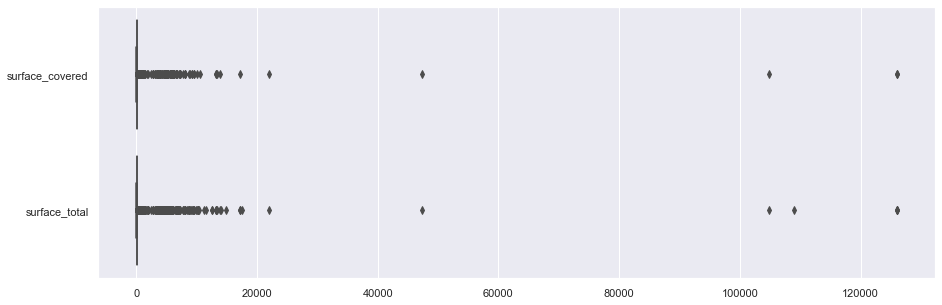

In [54]:
# Boxplots de las superficies
surfaces = data[["surface_covered", "surface_total"]]

plt.figure(figsize=(15,5))
sns.boxplot(data= surfaces, orient="h")

plt.show()

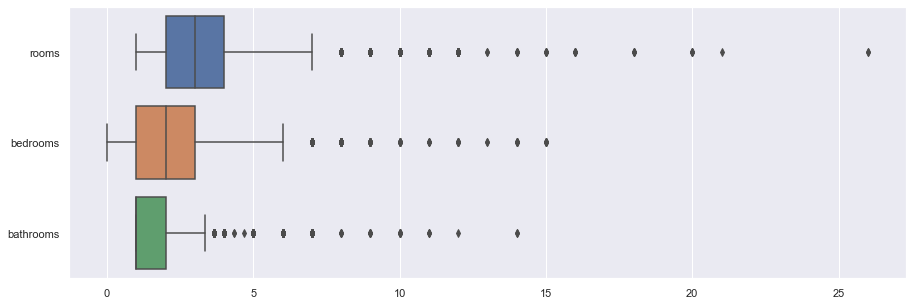

In [55]:
#Boxplot de rooms, bedrooms y bathrooms
box_info = data[["rooms", "bedrooms", "bathrooms"]]

plt.figure(figsize=(15,5))
sns.boxplot(data= box_info, orient="h")

plt.show()

Como podemos ver en los gráficos anteriores, hay demasiados valores fuera de las cajas, lo que se puede interpretar como valores atípicos (outliers). Este tipo de datos (además de que puede que no sean ciertos por ser errores de registro pueden hacer que el modelo no prediga de una buena forma.

Para eliminarlos, se utiliza el criterio de del IQR (Rango intercuartil) ajustando ciertos datos.

Para esto hacemos una función que nos ayude a aplicarlo más fácilmente:

In [56]:
def IQR (x):
    """Función para conocer el Rango InterCaurtil,
    el Límite superior e inferior
    Arguments:
    - Columna de un DF
    
    Retunrs:
    - IQR de la columna
    - Límite superior
    - Límite inferior
    """
    iqr = x.quantile(0.75) - x.quantile(0.25)
    lim_sup = x.quantile(0.75) + (iqr*1.5)
    lim_inf = x.quantile(0.25) - (iqr*1.5)
    return print("El IQR es "+ str(iqr) + "\nEl límite superior es " + str(lim_sup) + "\nEl límite inferior es "+ str(lim_inf))

#### surface_covered:

In [57]:
#Para surface_covered
IQR(data.surface_covered)

El IQR es 51.0
El límite superior es 171.5
El límite inferior es -32.5


**Lim Superior:** Podemos tomar 2 veces el límite superior, que sería: $343 m^2$.  
**Lim Inferior:** No podemos tomar $-32.5m^2$ (no hay propiedades con superficies negativas), por lo que vamos a utilizar $20 m^2$, ya que podría ser una medida mínima (quizás demasiado pequeña) para una casa, departamento o PH.

#### surface_total:

In [58]:
IQR(data.surface_total)

El IQR es 62.0
El límite superior es 204.0
El límite inferior es -44.0


**Lim Superior:** Podemos tomar 2 veces el límite superior, que sería: $408 m^2$.  
**Lim Inferior:** No podemos tomar $-44m^2$ (no hay propiedades con superficies negativas), por lo que, de igual forma, utilizamos $20 m^2$.

#### rooms:

In [59]:
IQR(data.rooms)

El IQR es 2.0
El límite superior es 7.0
El límite inferior es -1.0


**Lim Superior:** Podemos tomar el límite superior, que son: 7.  
**Lim Inferior:** No podemos tomar -1 habitación, por lo que utilizamos el valor mínimo mostrado en el dataset, que es 1.

#### bedrooms:

In [60]:
IQR(data.bedrooms)

El IQR es 2.0
El límite superior es 6.0
El límite inferior es -2.0


**Lim Superior:** Podemos tomar el límite superior, que son: 6.  
**Lim Inferior:** No podemos tomar -2 habitaciones, por lo que utilizamos el valor mínimo mostrado en el dataset, que es 0.

#### bathrooms:

In [61]:
IQR(data.bathrooms)

El IQR es 1.0
El límite superior es 3.5
El límite inferior es -0.5


**Lim Superior:** Podemos tomar el límite superior + 0.5 (para redondearlo hacia arriba, ya que no se manejan medios baños), que son: 4.  
**Lim Inferior:** No podemos tomar -0.5 baños, por lo que utilizamos 1 que es el valor mínimo (y si es casa, departamento o PH, por lo menos debería tener 1 baño).

#### price:

In [62]:
IQR (data.price)

El IQR es 158200.0
El límite superior es 515300.0
El límite inferior es -117500.0


**Lim Superior:** Podemos tomar 2 veces el límite superior: 1,030,600.  
**Lim Inferior:** No podemos tomar precios negativos, por lo que tomamos el valor mínimo que aparece en el dataset, que es de 6,000 (incluso no hay necesidad de filtrarlo).

In [63]:
#Armamos el dataset con los nuevos límites:
data = data[(data["surface_total"]>=20) & (data["surface_total"]<=408) & 
            (data["surface_covered"]>=20) & (data["surface_covered"]<=343) & 
            (data["bathrooms"]<=4) & 
            (data["bedrooms"]<=6) & 
            (data["rooms"]<=7) & 
            (data["price"]<=1030600)]

In [64]:
data.head()

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH
5,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH
6,Capital Federal,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Muy lindo PH, con terraza propia, 96m2! por es...",PH


In [65]:
data.shape

(63311, 11)

In [66]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
rooms,63311.0,2.823238,1.174593,1.0,2.0,3.0,4.0,7.0
bedrooms,63311.0,1.851874,0.970883,0.0,1.0,2.0,3.0,6.0
bathrooms,63311.0,1.467991,0.709818,1.0,1.0,1.0,2.0,4.0
surface_total,63311.0,85.879805,57.387342,20.0,48.0,69.0,103.0,408.0
surface_covered,63311.0,73.733638,45.466995,20.0,43.0,60.0,90.0,343.0
price,63311.0,216479.637978,153303.759137,6000.0,118000.0,167000.0,260000.0,1025000.0


#### Comprobamos los cambios con gráficos

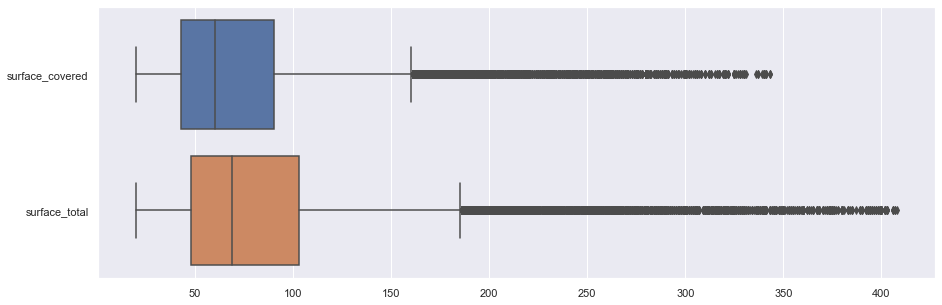

In [67]:
# Boxplots de las superficies
surfaces = data[["surface_covered", "surface_total"]]

plt.figure(figsize=(15,5))
sns.boxplot(data= surfaces, orient="h")

plt.show()

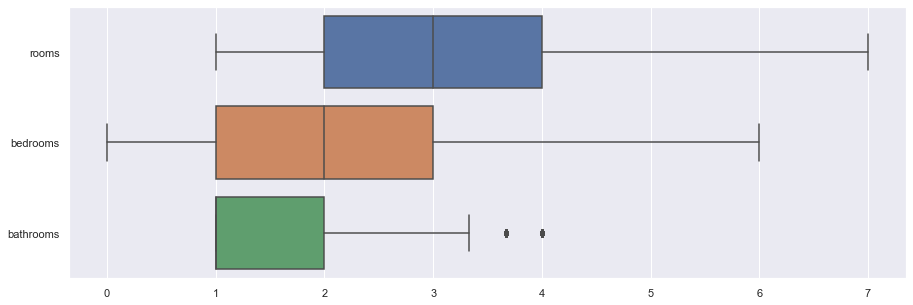

In [68]:
#Boxplot de rooms, bedrooms y bathrooms
box_info = data[["rooms", "bedrooms", "bathrooms"]]

plt.figure(figsize=(15,5))
sns.boxplot(data= box_info, orient="h")

plt.show()

Hacemos un pairplot para ver la relación (correlación) entre las variables con respecto al tipo de propiedad

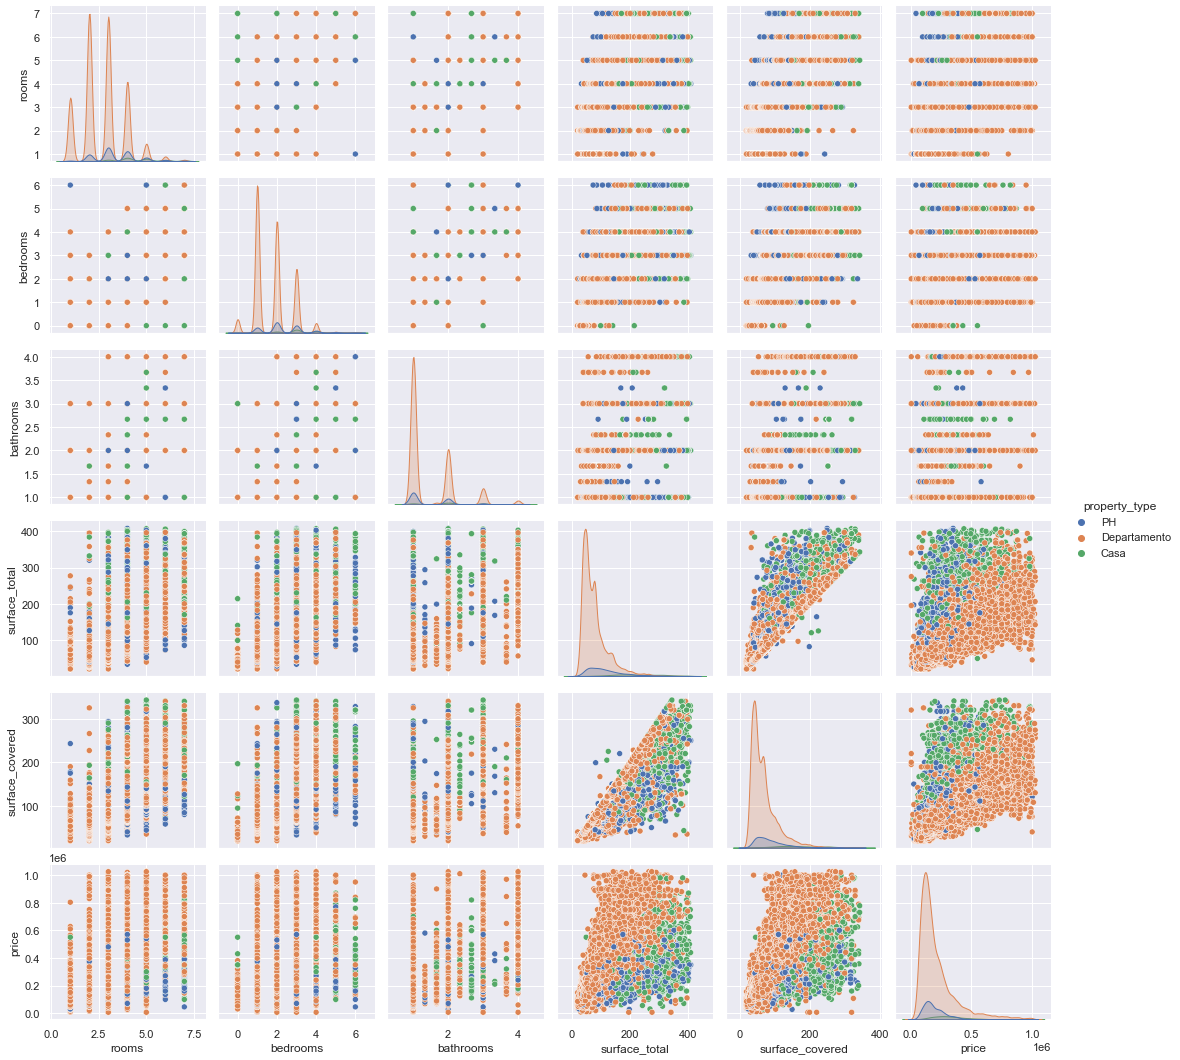

In [69]:
sns.pairplot(data, hue = "property_type")

En este gráfico  podemos ver las correlaciones que hay entre las variables, por ejemplo:
* El precio con ambas superficies (La superficie está relacionada con el costo de la propiedad). En general a mayor cantidad de metros cuadrados de la propiedad siempre van a ser más caras. Lo mismo con número de habitaciones y baños.
* Para el caso de las superficies tambien se ve una correlacion lieneal alta (a mayor superficie total, mayor superficie cubierta).

Para ver la matriz de correlación (de forma gráfica) tenemos:

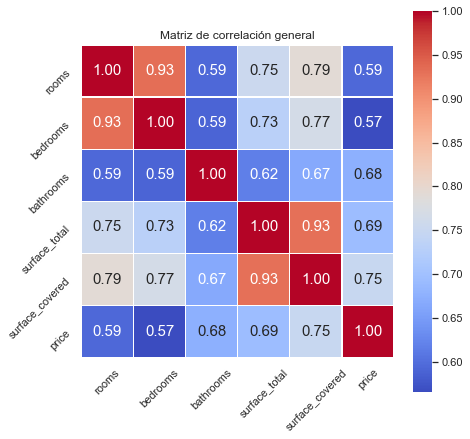

In [70]:
plt.figure(figsize=(7,7))

sns.heatmap(data.corr(), cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm', linewidths=.5)
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title ("Matriz de correlación general")
plt.show()

Como podemos ver, con los tres tipos de propiedades, las correlaciones más grandes están en:
* Entre el número de rooms y de bedrooms y surface_covered con surface_total.

Las correlaciones que más "afectan" el precio son:
1. surface_covered
2. surface_total
3. bathrooms
4. rooms
5. bedrooms

Podemos separar estos datos por tipo de propiedad para ver si los tres tipos de propiedades tienen la misma importancia en las variables que se utlizan para asignar los precios (tienen las mismas correlaciones):

**Para Departamentos:**

In [71]:
departamentos = data[data.property_type.isin(["Departamento"])]
corr_dptos = departamentos.corr()

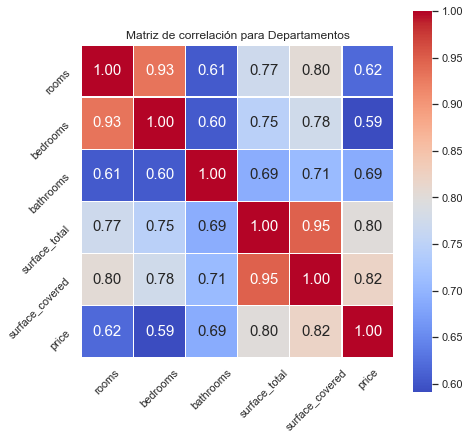

In [72]:
plt.figure(figsize=(7,7))

sns.heatmap(corr_dptos, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm', linewidths=.5)
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title ("Matriz de correlación para Departamentos")
plt.show()

Para los **Departamentos** las correlaciones más grandes están en:
* Entre el número de rooms y de bedrooms y surface_covered con surface_total.

Las correlaciones que más "afectan" el precio son:
1. surface_covered
2. surface_total
3. bathrooms
4. rooms
5. bedrooms

No hay cambios significativos con respecto a los tres tipos de propiedades.

**Para PH:**

In [73]:
ph = data[data.property_type.isin(["PH"])]
corr_ph = ph.corr()

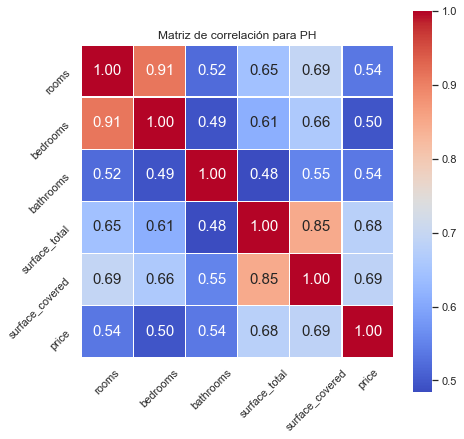

In [74]:
plt.figure(figsize=(7,7))

sns.heatmap(corr_ph, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm', linewidths=.5)
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title ("Matriz de correlación para PH")
plt.show()

Para los **PH** las correlaciones más grandes están en:
* Entre el número de rooms y de bedrooms y surface_covered con surface_total.

Las correlaciones que más "afectan" el precio son:
1. surface_covered
2. surface_total
3. rooms
3. bathrooms
4. bedrooms

En PH cambia el orden de correlación de las variables: Para el precio del PH es más importante el numero de rooms y de bathrooms (empatado) y por último el número de bedrooms. Además la correlación que hay en general en las variables es más baja que para los Departamentos.

**Para Casa:**

In [75]:
casa = data[data.property_type.isin(["Casa"])]
corr_casa = casa.corr()

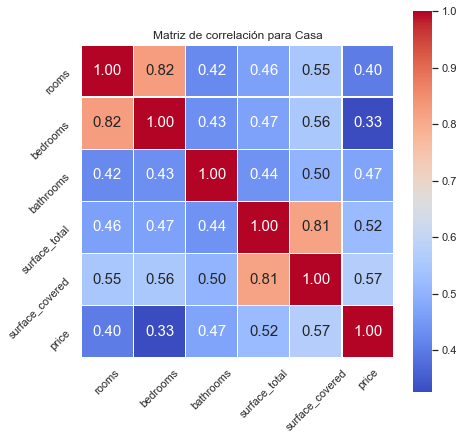

In [76]:
plt.figure(figsize=(7,7))

sns.heatmap(corr_casa, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm', linewidths=.5)
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title ("Matriz de correlación para Casa")
plt.show()

Para las **Casas** las correlaciones más grandes están en:
* Entre el número de rooms y de bedrooms y surface_covered con surface_total.

Las correlaciones que más "afectan" el precio son:
1. surface_covered
2. surface_total
3. bathrooms
4. rooms
5. bedrooms

Aunque no hay cambios significativos del dataset completo con respecto a los Departamentos, sí podemos ver que las correlaciones en las Casas son las más bajas que en los Departamentos y en los PH.

Con los resultados que obtuvimos podemos ver que sí vale la pena hacer separación por tipo de propiedad, ya que las correlaciones son diferentes para cada propiedad. Para esto se prefiere hacer variables Dummies ya que trabajan mejor con modelos sin alterarlos por ser 1 ó 0, además de no tener mayor importancia por el tipo de propiedad que sea (no es mayor o mejor Casa que Departamento o PH).


### Generación de nuevas variables (Dummies).

Generamos las variables dummies para el dataset

In [77]:
# Hacer la variable property_type a dummy.
dummy_property_type= pd.get_dummies(data["property_type"], prefix="property")

In [78]:
dummy_property_type

,property_Casa,property_Departamento,property_PH
1,0,0,1
2,0,0,1
3,0,0,1
5,0,0,1
6,0,0,1
...,...,...,...
146542,0,1,0
146545,0,1,0
146554,0,0,1
146555,0,0,1


In [79]:
#Hacemos otro dataset al que añadir las columnas de las variables dummies creadas
data2 = pd.concat([data, dummy_property_type], axis=1)

In [80]:
data2.head()

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type,property_Casa,property_Departamento,property_PH
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,0,0,1
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,0,0,1
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,0,0,1
5,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,0,0,1
6,Capital Federal,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Muy lindo PH, con terraza propia, 96m2! por es...",PH,0,0,1


## Modelo Benchmarck (proyecto1)

Se realiza como modelo Benchmark el Decision Tree del proyecto 1 (mismas características) para ver si mejora con la implementación de la transformación de datos realizados anteriormente.

Los datos obtenidos del mejor modelo del proyecto 1 fueron:

- $R^2$ = 0.754930	
- RMSE = 149,649.08	
- Profundidad: 10

Para evaluar los modelos vamos a utilizar las mismas medidas que en el proyecto 1.


### Elección de métricas.

En este modelo utilizamos como primera métrica de evaluación de modelos el $RMSE$ (Root Mean Square Error), ya que representa la raíz cuadrada de la distancia cuadrada promedio entre el valor real ($y_i$) y el valor pronosticado ($\hat{y}_i$). Indica cuan cerca están los puntos de datos observados de los valores predichos del modelo.

$RMSE$ se puede interpretar como la desviación estándar de la varianza inexplicada y está en las mismas unidades que la variable de respuesta.

Entre menor sea el valor del RMSE es mejor.


$$RMSE = \sqrt{MSE}$$

esto es:
$$RMSE = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y})^2}$$

Para los modelo se obtendrá con `sklearn.metrics.mean_squared_error` de `(y_train, y_train_pred, squared=False))` 



**Criterios de utilización:** Elegir el modelo con el menor valor de $RMSE$.

---

Como segunda opción utlizamos $R^2$, 
El $R^2$ (o coeficiente de determinación) es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada.

La definición de $R^2$ es bastante sencilla: es el porcentaje de la variación en la variable de respuesta que es explicado por un modelo lineal. Es decir:

$$R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}$$

o sea: 

$$R^2 = \frac{variación \  \  explicada}{variación \  \ total}$$

El $R^2$ es un número decimal y siempre está entre 0 y 1:

* 0 indica que el modelo no explica ninguna porción de la variabilidad de los datos de respuesta en torno a su media.
* 1 indica que el modelo explica toda la variabilidad de los datos de respuesta en torno a su media.

En general, cuanto mayor es el $R^2$, mejor se ajusta el modelo a los datos.

Para los modelos se obtendrá con el `r2_score` de la librería `sklearn.metrics`.

**Criterios de utilización:** Podemos aceptar el modelo con el mayor número de $R^2$.

In [81]:
#Importamos las liubrerías necesarias:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Separamos las variables `X` añadiendo los tipos de propiedades como extra. `y` (nuestra variable a predecir) será el precio.

In [82]:
X = data2[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "property_Casa", "property_Departamento", "property_PH"]] 
y = data2.price

In [83]:
X.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_Casa,property_Departamento,property_PH
1,2.0,1.0,2.0,70.0,58.0,0,0,1
2,2.0,1.0,1.0,45.0,45.0,0,0,1
3,2.0,1.0,1.0,85.0,50.0,0,0,1
5,2.0,1.0,1.0,56.0,56.0,0,0,1
6,2.0,1.0,1.0,70.0,70.0,0,0,1


In [84]:
y.head()

1    159000.0
2    125000.0
3    295000.0
5    150000.0
6    159500.0
Name: price, dtype: float64

In [85]:
#Separación de datos en entrenamiento (70%) y prueba (30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [86]:
#Creamos el modelo con la mejor profundidad del proyecto 1 y con random state 42 (para mantener los datos)
modeloP1 = DecisionTreeRegressor(max_depth= 10, random_state = 42)

In [87]:
#Entrenamos el modelo:
modeloP1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [88]:
#Predecimos y evaluamos el modelo con los datos de Train y de Test:
y_train_pred = modeloP1.predict(X_train)
y_test_pred = modeloP1.predict(X_test)

In [89]:
# Para obtener el valor del RMSE:
print ("RMSE en train: ", mean_squared_error(y_train, y_train_pred, squared=False))
print ("RMSE en test: ", mean_squared_error(y_test, y_test_pred, squared=False))

RMSE en train:  73608.27696658428
RMSE en test:  81161.02314635804


In [90]:
#Para obtener el valor de R2:
print ("El valor de R2 en train es: ", r2_score(y_train, y_train_pred))
print ("El valor de R2 en test es: ", r2_score(y_test, y_test_pred))

El valor de R2 en train es:  0.7685047674368191
El valor de R2 en test es:  0.7223764263267569


### Conclusiones:

Los datos obtenidos para `y_test` del mejor modelo del proyecto 1 fueron:

- $R^2$ = 0.754930	
- RMSE = $149,649.08	
- Profundidad: 10

Los datos obtenidos para `y_test` del modelo con los datos optimizados del proyecto 2 fueron:

- $R^2$ = 0.722376	
- RMSE = $81,161.02	
- Profundidad: 10

Podemos ver que el valor de $R^2$ disminuyó en el proyecto 2 lo que podría interpretarse como malo, ya que se busca que crezca este valor. Sin embargo el valor del RMSE (que representa la variabilidad de precios en $) disminuyó significativamente cuando utilizamos los datos optimizados. 

Es por eso que se utilizan las dos métricas para validar la efectividad del modelo.

**Conclusión:** Hasta aquí podríamos decir que nos quedamos con los datos optimizados del proyecto 2.

Vamos a probar diferentes modelos para ver cuál sería mejor.

# PARTE B - Modelos Avanzados

### 1er Modelo Avanzado (Optimización de Hiperparámetros)

Vamos a utilizar Gridsearch para optimizar los hiperparámetros de los modelos KNN y Árbol de Decisión.

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

**Para KNN:**

In [92]:
knn = KNeighborsRegressor()

In [93]:
#Hacemos la grilla de Grid Search para KNN:
param_grid1 = {'n_neighbors':np.arange(1, 20),
              'weights': ['uniform', 'distance'],
              'leaf_size':[1,3,5,7,10],
              'algorithm':['auto', 'kd_tree']}

In [94]:
# creamos el modelo para KNN
model = GridSearchCV(knn, param_grid=param_grid1, cv=5)

In [95]:
#Entrenamos el modelo
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'leaf_size': [1, 3, 5, 7, 10],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'weights': ['uniform', 'distance']})

In [96]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores parametros: {'algorithm': 'auto', 'leaf_size': 3, 'n_neighbors': 19, 'weights': 'distance'}
Mejor Score: 0.7130973534697024



In [97]:
#Utilizamos el mejor modelo para predecir y obtener el RSME
y_pred_knn = model.predict(X_test)

In [98]:
# Para obtener el valor del RMSE:
print ("RMSE en test: ", mean_squared_error(y_test, y_pred_knn, squared=False))

RMSE en test:  79859.47551981297


In [99]:
#Para obtener el valor de R2:
print ("El valor de R2 en test es: ", r2_score(y_test, y_pred_knn))

El valor de R2 en test es:  0.7312093107049735


Podemos ver que mejoró este modelo con respecto al modelo utilizado en el proyecto 1. Vamos a seguir viendo otras opciones de modelos.

**Para Árbol de Decisión:**

In [100]:
tree= DecisionTreeRegressor()

In [101]:
#Armamos la grilla para Grid Search:
param_grid2 = {'criterion':["mse"],
              'max_depth': np.arange(1, 20),
              'min_samples_split': [2],            
              'min_samples_leaf':[1,2,3]} 

In [102]:
# creamos el modelo para DT:
model2 = GridSearchCV(tree, param_grid=param_grid2, cv=5)

In [103]:
#Entrenamos el modelo
model2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2]})

In [104]:
print("Mejores parametros: "+str(model2.best_params_))
print("Mejor Score: "+str(model2.best_score_)+'\n')

Mejores parametros: {'criterion': 'mse', 'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 2}
Mejor Score: 0.718914890416777



In [105]:
#Utilizamos el mejor modelo para predecir y obtener el RSME
y_pred_tree = model2.predict(X_test)

In [106]:
#Para obtener el valor del RMSE:
print ("RMSE en test: ", mean_squared_error(y_test, y_pred_tree, squared=False))

RMSE en test:  80822.50376464277


In [107]:
#Para obtener el valor de R2:
print ("El valor de R2 en test es: ", r2_score(y_test, y_pred_tree))

El valor de R2 en test es:  0.7246875101810462


**Conclusión de estos dos primeros modelos:**

Podemos ver que el mejor es `knn`, ya que tiene un RMSE = 79,859.47 y un valor de $R^2$ de 0.73 que incluso son mejores que los obtenidos en el primer modelo benchmark. Mientras que este modelo de `árbol` es mejor que el modelo anterior, pero peor que el de `knn` con los mismos datos.

Vamos a realizar más modelos para ver si se mejora el valor de RMSE y R2.

### 2do Modelo Avanzado
Vamos a realizar una regresión lineal y veremos si se puede mejorar con atributos polinomiales.

In [108]:

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [109]:
#Vamos a escalar los datos para realizar la regresión con datos escalados.
sc = StandardScaler()

In [110]:
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

y_train_sc = sc.fit_transform(y_train.values.reshape(-1, 1))

In [111]:
#Creamos el modelo
lr = LinearRegression()

In [112]:
#Entrenamos el modelo:
lr.fit(X_train, y_train)

LinearRegression()

In [113]:
#Predecimos y evaluamos el modelo con los datos de Train y de Test:
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

In [114]:
# Para obtener el valor del RMSE:
print ("RMSE en train: ", mean_squared_error(y_train, y_train_pred_lr, squared=False))
print ("RMSE en test: ", mean_squared_error(y_test, y_test_pred_lr, squared=False))

RMSE en train:  89605.35728463305
RMSE en test:  89243.1289787998


In [115]:
#Para obtener el valor de R2:
print ("El valor de R2 en train es: ", r2_score(y_train, y_train_pred_lr))
print ("El valor de R2 en test es: ", r2_score(y_test, y_test_pred_lr))

El valor de R2 en train es:  0.6569505719540529
El valor de R2 en test es:  0.6643312654015665


Podemos ver que el desempeño de la regresion lineal no es mejor que el modelo entrenado con los árboles de decisión entrenados anteriormente.

Vamos a probar haciendo una regresión polinómica patra ver si mejora el modelo.

**Regresión polinomial**

Hacemos una función que cambie los grados y haga la regresión lineal e imprima los valores de $RSME$ y $R^2$ 

In [116]:
def reg_poly (X_train, X_test, y_train, y_test):
    """Función para realizar regresiones polinómicas de grados 2,3,4 y 5
    Arguments:
    - Valores de entrenamiento (X_train, y_train)
    - Valores de prueba (X_test, y_test)
    
    Retunrs:
    - RMSE en entrenamiento y prueba
    - R2 en entrenamiento y prueba
    """
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    
    lr = LinearRegression()
    
    degrees = [2,3,4,5]
    
    for degree in degrees:
        poly = PolynomialFeatures(degree=degree, include_bias=False)
        
        #Cambiamos el grado de X_train y X_test:
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.fit_transform(X_test)
        
        #Entrenamos la regresión
        lr.fit(X_train_poly, y_train)
        
        #Predecimos y evaluamos el modelo con los datos de Train y de Test:
        y_train_pred_lr = lr.predict(X_train_poly)
        y_test_pred_lr = lr.predict(X_test_poly)
        
        #Obtenemos el valor del RMSE:
        print ("Para grado ", degree)
        print ("El valor de RMSE en train es: ", mean_squared_error(y_train, y_train_pred_lr, squared=False))
        print ("El valor de RMSE en test es: ", mean_squared_error(y_test, y_test_pred_lr, squared=False))
        
        #Para obtener el valor de R2:
        print ("El valor de R2 en train es: ", r2_score(y_train, y_train_pred_lr))
        print ("El valor de R2 en test es: ", r2_score(y_test, y_test_pred_lr))
        print ("------------")

In [117]:
reg_poly(X_train, X_test, y_train, y_test)

Para grado  2
El valor de RMSE en train es:  82323.58322071779
El valor de RMSE en test es:  83002.90263745058
El valor de R2 en train es:  0.710440859740073
El valor de R2 en test es:  0.7096325879442391
------------
Para grado  3
El valor de RMSE en train es:  81114.44420549415
El valor de RMSE en test es:  82066.03275273355
El valor de R2 en train es:  0.7188842739431647
El valor de R2 en test es:  0.7161504616798765
------------
Para grado  4
El valor de RMSE en train es:  80047.73666734272
El valor de RMSE en test es:  82133.40131403894
El valor de R2 en train es:  0.726229366076578
El valor de R2 en test es:  0.7156842423856983
------------
Para grado  5
El valor de RMSE en train es:  78812.63951607715
El valor de RMSE en test es:  87309.00304566922
El valor de R2 en train es:  0.7346124816687525
El valor de R2 en test es:  0.6787231950788059
------------


**Conclusión de estos dos segundos modelos:**

Podemos ver que la mejor opción haciendo una regresión polinomial es de grado 3, ya que con grado 4, además de ser más variables empieza a subir el RMSE y buscamos que baje.

Además los resultados obtenidos en este modelo son aún más bajos que los obtenidos con el modelo benchmark del proyecto 1, por lo que nos seguimos quedando con el modelo `knn` anterior.

### 3er Modelo Avanzado

Vamos a realizar un `RandomForestRegressor` con los parámetros por defecto.

In [118]:
from sklearn.ensemble import RandomForestRegressor

In [119]:
#Hacemos el modelo
forest = RandomForestRegressor(n_jobs=-1, oob_score=True, random_state=42)

In [120]:
#Entrenamos el modelo:
forest.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, oob_score=True, random_state=42)

In [121]:
#Evaluar el desempeño en los conjuntos de train y test:
y_pred_train = forest.predict(X_train)
y_pred_test = forest.predict(X_test)

In [122]:
# Para obtener el valor del RMSE:
print ("RMSE en train: ", mean_squared_error(y_train, y_pred_train, squared=False))
print ("RMSE en test: ", mean_squared_error(y_test, y_pred_test, squared=False))

RMSE en train:  50649.873657152166
RMSE en test:  74191.26436723105


In [123]:
#Para obtener el valor de R2:
print ("El valor de R2 en train es: ", r2_score(y_train, y_pred_train))
print ("El valor de R2 en test es: ", r2_score(y_test, y_pred_test))

El valor de R2 en train es:  0.8903911854764233
El valor de R2 en test es:  0.7680112854136137


Podemos ver que al realizar un Random Forest con los valores por default tanto el $RMSE$ como el $R^2$ mejoran en comparación al árbol sencillo.

Veamos si mejora probando con Gridsearch y diferentes hiperparámetros.

Los hiperparámetros a probar:
- `n_estimators: [200, 300, 400, 500, 750, 1000]` Diferente cantidad de árboles para crear el bosque.
- `min_samples_split': [2,3,4,5]` Diferente número mínimo de muestras necesarias para dividir un nodo interno
- `min_samples_leaf':[1,3,5]`  Diferente número mínimo de muestras necesarias para estar en un nodo hoja.

In [124]:
#Hacemos la grilla para Grid Search:
param_grid3 = {'n_estimators': [200, 300, 400, 500, 750, 1000],   
              'min_samples_split': [2,3,4,5],    
              'min_samples_leaf':[1,3,5], 
             }   

In [125]:
model = GridSearchCV(forest, param_grid=param_grid3, cv=5)

In [126]:
#Enrenamos el modelo:
model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_jobs=-1, oob_score=True,
                                             random_state=42),
             param_grid={'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [200, 300, 400, 500, 750, 1000]})

In [127]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores parametros: {'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 750}
Mejor Score: 0.7583038838719347



Con estos datos armamos un modelo para validar con los datos de entrenamiento y prueba:

In [128]:
forest2 = RandomForestRegressor(n_jobs=-1, oob_score=True, random_state=42, min_samples_leaf=1, min_samples_split=5, n_estimators=750)

In [129]:
forest2.fit(X_train, y_train)

RandomForestRegressor(min_samples_split=5, n_estimators=750, n_jobs=-1,
                      oob_score=True, random_state=42)

In [130]:
#Evaluar el desempeño en los conjuntos de train y test:
y_pred2_train = forest2.predict(X_train)
y_pred2_test = forest2.predict(X_test)

In [131]:
#Para obtener el valor del RMSE:
print ("RMSE en train: ", mean_squared_error(y_train, y_pred2_train, squared=False))
print ("RMSE en test: ", mean_squared_error(y_test, y_pred2_test, squared=False))

RMSE en train:  53844.871420189585
RMSE en test:  73901.8102866759


In [132]:
#Para obtener el valor de R2:
print ("El valor de R2 en train es: ", r2_score(y_train, y_pred2_train))
print ("El valor de R2 en test es: ", r2_score(y_test, y_pred2_test))

El valor de R2 en train es:  0.8761267773181529
El valor de R2 en test es:  0.7698179425464302


**Conclusión terceros modelos:**

Hasta este momento la mejor opción es el RandomForest con `min_samples_split=5, n_estimators=750` ya que nos da el RMSE más bajo y $R^2$ más alto.


## Conclusiones de la aplicación de modelos:

Haciendo un análisis de los resiultados de RMSE y valor de $R^2$ vemos que el mejor modelo es: **RandomForestRegressor** (modelo **forest2**) con `min_samples_split=5, n_estimators=750` ya que:

- El RMSE representa la variación de precio (en mismas unidades), por lo que elegimos el que tenga menor variación con los datos de test y ése es el RandomForest que muestra un RMSE de 73,901.81.
- A la par el valor de $R^2$ que representa un porcentaje de la variación explicada/variación total de igual forma es el del RandomForest que tiene un valor de 0.77.

Siendo este modelo el mejor para trabajar con este dataset.

Con la aplicación de estos modelos redujimos por mitad los valores (de RMSE) obtenidos en el proyecto 1. 

NOTA: Para los valores de $R^2$ no hubo grandes cambios, sin embargo ese dato varía según los datos con los que se trabaja en el dtaset, y al realizar una mayor transformación de datos (parte A de este proyecto) en comparación con la realizada en el proyecto 1, esto hace que varíe y no se vean mejoras en este indicador.

### PARTE C - Interpretación de modelos

De acuerdo a lo que el modelo permite, responde algunas o todas las siguientes preguntas:

* ¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? Si usaste una regresión lineal con regularización, presta atención a los parámetros (pendientes) obtenidas. Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?

Para nuestro caso el mejor modelo fue `RandomForest`, por lo que procederemos a ver.

    a. ¿Qué variables fueron relevantes para el modelo para hacer una predicción?

In [133]:
#Para ver la importancia de las feautures utilizadas
importancia_predictores = pd.DataFrame(
                            {"predictor": X.columns,
                             "importancia": forest2.feature_importances_,
                             "% importancia": forest2.feature_importances_*100 }
                            )
importancia_predictores.sort_values('importancia', ascending=False)

,predictor,importancia,% importancia
4,surface_covered,0.664546,66.454640
3,surface_total,0.174205,17.420531
6,property_Departamento,0.070702,7.070151
2,bathrooms,0.041571,4.157147
0,rooms,0.024935,2.493524
1,bedrooms,0.020985,2.098529
7,property_PH,0.002142,0.214211
5,property_Casa,0.000913,0.091267


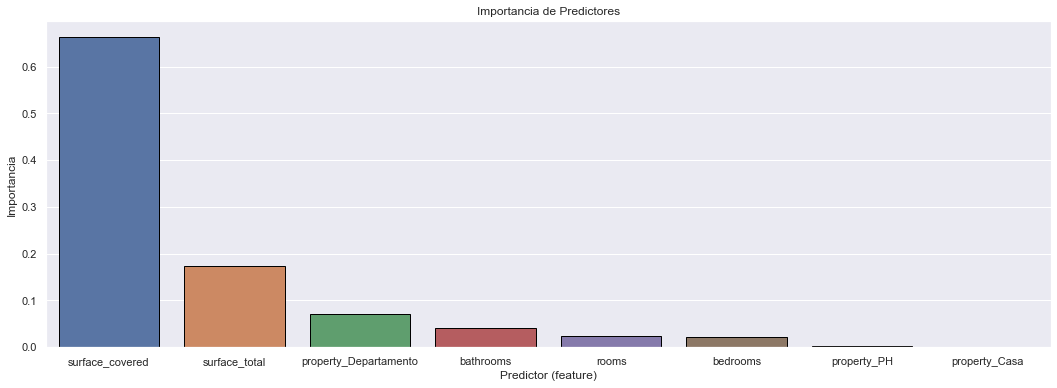

In [134]:
plt.figure(figsize=(18,6))

sns.barplot(data = importancia_predictores.sort_values('importancia', ascending=False), x="predictor", y= "importancia", lw=1, edgecolor="black")

plt.title ("Importancia de Predictores")
plt.xlabel("Predictor (feature)")
plt.ylabel("Importancia")
plt.show()

Podemos ver que las **variables más relevantes** fueron:
   - Superficie cubierta con un 66% de importancia, 
   - La superficie total con un 17% de importancia,
   - Si es departamento con un 7% de importancia.
   
De alguna manera suena lógico que el tamaño de un inmueble sea un dato fundamental para decidir el precio al que se venderá dicho inmueble.
   
Mientras que las variables que tuvieron **menos relevancia** para el modelo fueron:
   - Si es Casa con un 0.09% de importancia,
   - Si es PH con un 0.21% de importancia y
   - El numero de bedrooms con 0.21% de importancia

**b. Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué?**

Elección de 3 árboles al azar para ver qué atributos considera importantes: 50, 333, 675

In [135]:
#Hacemos una función para ver la importancia de los predictores que usan los diferentes árboles del bosque:
def importancia_de_predictores (x,y,z, modelo):
    """Función para ver la importancia de los predictores en 3 árboles de un bosque
    Arguments:
    - x,y,z -> 3 árboles de un bosque
    - modelo -> modelo del bosque a utilizar
    
    Retunrs:
    - DF con el % de importancia de cada columna
    """
    importancia_predictores = pd.DataFrame(
                            {"predictor": X.columns,
                             "importancia "+ str(x) : modelo[x].feature_importances_*100,
                             "importancia "+ str(y) : modelo[y].feature_importances_*100,
                             "importancia "+ str(z) : modelo[z].feature_importances_*100,}
                            )
    return importancia_predictores

In [136]:
#Vemos la importancia que tienen los árboles 50, 333 y 675:
importancia_de_predictores (50,333,675, forest2)

,predictor,importancia 50,importancia 333,importancia 675
0,rooms,2.785351,2.226133,2.618186
1,bedrooms,1.795098,2.453863,2.347206
2,bathrooms,4.161329,4.081920,3.782369
3,surface_total,17.571571,17.079466,17.769164
4,surface_covered,66.299676,66.799859,65.676438
5,property_Casa,0.117547,0.145800,0.132731
6,property_Departamento,7.035885,6.959257,7.367749
7,property_PH,0.233542,0.253703,0.306158


Podemos ver que la importancia de los features en los 3 árboles elegidos al azar es muy similar, ya que varía en muy poco. Con esto podemos ver que los árboles no difieren entre sí significativamente.

Así se vería el árbol 50:

In [137]:
#Importamos librería para visualización del árbol
from sklearn.tree import plot_tree
from sklearn.tree import export_text

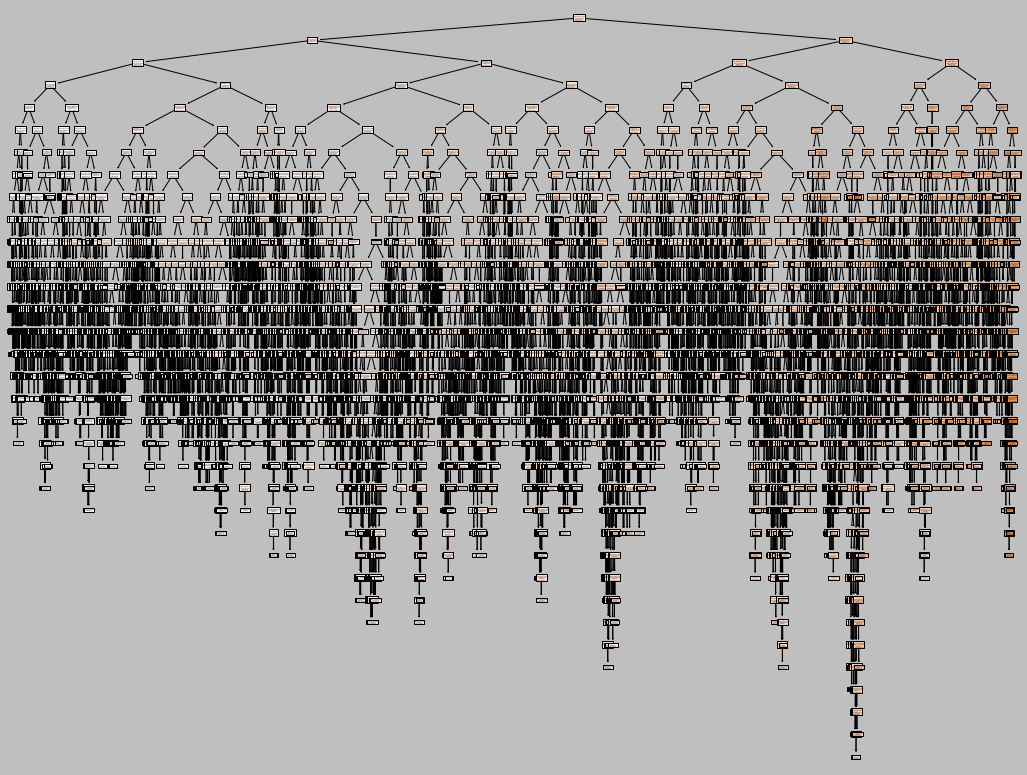

In [138]:
arbol_50 = forest2.estimators_[50]


with plt.style.context('grayscale'):
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (18,14))
    plot_tree(arbol_50, feature_names = X.columns, filled = True);

**c. ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?**

Con la utilizacion de modelos avanzados como Random Forest pude ver que mejoró mucho la cuestion del RMSE (varizanza entre el dato real y el obtenido con el modelo) y también bajó mucho con respecto al proyecto 1 (Disminuyó en más del 50%).

También pude ver que el factor que tiene más relevancia para predecir el precio es la `superficie cubierta`, y eso era de esperar, ya que entre más grande sea una propiedad su precio será mayor.

Creo que valdría la pena probar con los barrios, ya que no es lo mismo vivir en un barrio que en otro dentro de alguna ciudad.




* **¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?**

In [139]:
#Para obtener el valor del RMSE del modelo forest2:
print ("RMSE en train: ", mean_squared_error(y_train, y_pred2_train, squared=False))
print ("RMSE en test: ", mean_squared_error(y_test, y_pred2_test, squared=False))

RMSE en train:  53844.871420189585
RMSE en test:  73901.8102866759


Podemos ver que en los datos de train tenemos un RMSE más bajo que el de test, lo que quiere decir que al entrenar el modelo con los datos de train, tiende a clasificar mejor que cuando le mostramos datos nuevos (test). Esto es porque el Random Forest tiene varianza. Una solucion simple sería agregar mas datos para reducir la varianza, esto a costa de aumentar el sesgo del modelo (compensacion entre sesgo y varianza).

Para reducir la varianza en el modelo podemos:

- Agregar más datos al momento de entrenar,
- Utilizar regularizacion (no muy común en modelos como el RandomForest),
- Disminuir la complejidad del modelo,
- Crear de variables sintéticas.


### Crítica sobre la metodología utilizada

1.  Al realizar una mejor mejor transformación de datos como eliminar valores repetidos, imputar valores faltantes, etc, los modelos mostraron un mayor desempeño (incluso en el mejor modelo del proyecto anterior). Esto quiere decir que hacer una buena transformación de datos ayuda mucho para que el modelo sea lo mejor posible. **Tener buenos datos y limpios ayuda al desempeño del(os) modelo(s) a realizar.

2. Para este caso en particular el utilizar modelos avanzados como el Random Forest o Regresión con valores polinomiales da un mejor desempeño, esto se debe a que los datos no siguen algún tipo de distribución conocida, sino que cada persona puso el precio según creyó conveniente.

3. El uso de GridSearch para probar diferentes modelos con diferentes parámetros ayudó mucho, AUNQUE para el caso del Random Forest tardó mucho en la ejecución, pero sí ayudó, ya que fue el mejor modelo.


En particular creo que el probar con diferentes modelos abre la ventana para elegir el que dé un mejor resultado (especialmente si los datos no siguen alguna distribución en particular, como en este caso.)